In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [9]:
from google.colab import files

uploaded = files.upload()

Saving RELIANCE.NS.csv to RELIANCE.NS.csv


In [10]:
#----------------------------------------------------------------------------
df = pd.read_csv("RELIANCE.NS.csv")
# df = pd.read_csv("/content/Nifty50.csv")
#----------------------------------------------------------------------------



# Get close price data
data = df.filter(['Open']).values

# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
training_data_len = int(len(data) * 0.8)
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(100, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=100)

# Create testing data set
test_data = scaled_data[training_data_len - 10:, :]
x_test = []
y_test = data[training_data_len:, :]

for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



# Predict the future trend
future_data = df.filter(['Open'])
last_60_days = future_data[-10:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
future_prediction = model.predict(X_test)
future_prediction = scaler.inverse_transform(future_prediction)
print('Predicted price for the next day:', future_prediction[0][0])

Epoch 1/100
6/6 [==============================] - 4s 18ms/step - loss: 0.0477 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0113 - accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 10/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0044 - 

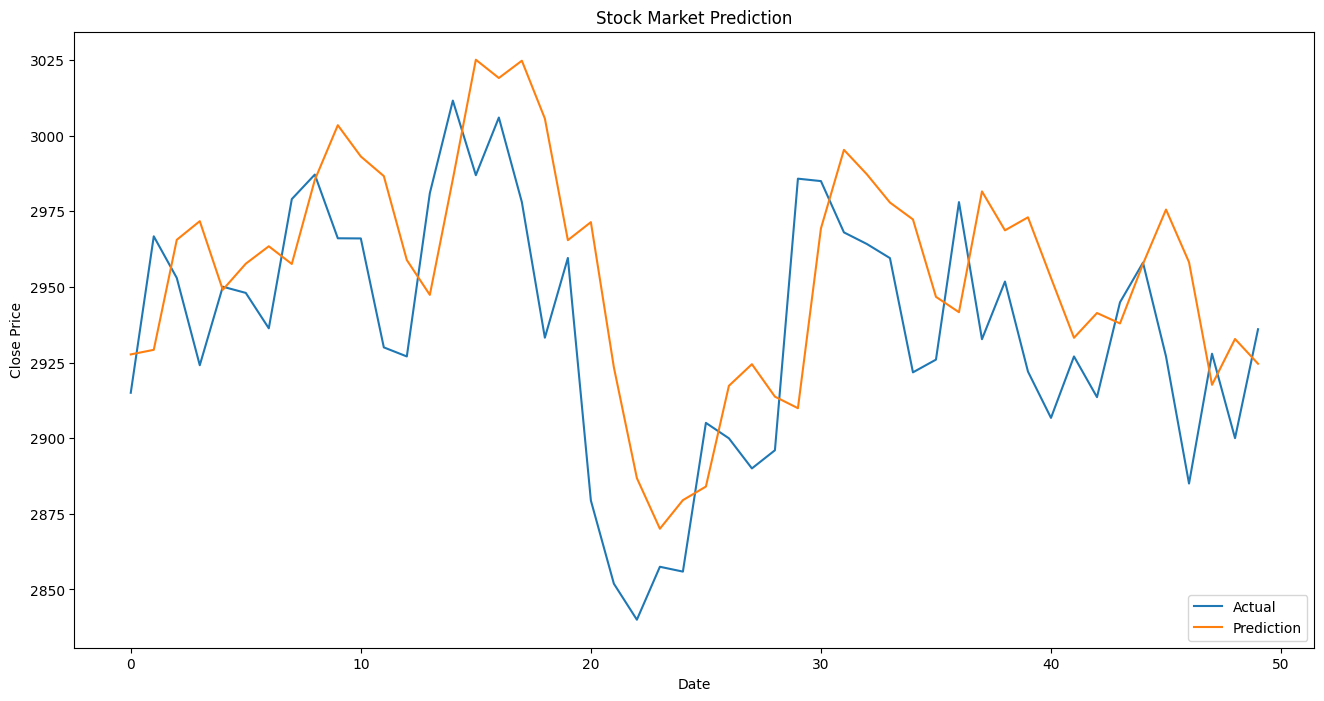

In [11]:
# Plot the predictions and actual values
plt.figure(figsize=(16,8))
plt.title('Stock Market Prediction')
plt.plot(y_test)
plt.plot(predictions)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['Actual', 'Prediction'], loc='lower right')
plt.show()

In [12]:
future_prediction

array([[2945.9316]], dtype=float32)

In [13]:
# make predictions for the next 10 days
future_data = df.filter(['Close'])
last_60_days = future_data[-180:]
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_prices = []
for i in range(180):
    predicted_price = model.predict(X_test)
    predicted_prices.append(predicted_price[0][0])
    X_test = np.append(X_test, [predicted_price], axis=1)

# invert the scaling
predicted_prices = np.array(predicted_prices).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_prices)

# print the predicted prices
print(predicted_prices)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
[[3018.6929]
 [3081.0806]
 [3148.5598]
 [3214.9954]
 [3278.6318]
 [3339.8088]
 [3400.265 ]
 [3462.509 ]
 [3529.2258]
 [3602.8303]
 [3685.2107]
 [3777.6626]
 [3880.9585]
 [3995.492 ]
 [4121.4424]
 [4258.8945]
 [4407.877 ]
 [4568.3066]
 [4739.833 ]
 [4921.617 ]
 [5112.117 ]
 [5308.947 ]
 [5508.8896]
 [5708.111 ]
 [5902.549 ]
 [6088.3877]
 [6262.486 ]
 [6422.647 ]
 [6567.6763]
 [6697.275 ]
 [6811.8306]
 [6912.2036]
 [6999.54  ]
 [7075.1304]
 [7140.303 ]
 [7196.3486]
 [7244.4707]
 [7285.758 ]
 [7321.1772]
 [7351.574 ]
 [7377.6753]
 [7400.1074]
 [7419.4043]
 [7436.019 ]
 [7450.342 ]
 [7462.702 ]
 [7473.3813]
 [7482.615 ]
 [7490.6074]
 [7497.533 ]
 [7503.541 ]
 [7508.755 ]
 [7513.2837]
 [7517.221 ]
 [7520.6445]
 [7523.6274]
 [7526.226 ]
 [7528.491 ]
 [7530.4644]
 [7532.1865]
 [7533.691 ]
 [7535.0044]
 [7536.152 ]
 [7537.1543]
 [7538.031 ]
 [7538.7983]
 [7539.4688]
 [7540.056 ]
 [7540.569 ]
 [7541.0195]
 [7541.4126]
 [7541.759 ]
 [7542.06  ]

[2248.611816, 2256.734131, 2234.720703, 2253.042236, 2261.349121, 2284.424316, 2298.269287, 2306.530029, 2279.624512, 2298.177002, 2301.961182, 2273.348145, 2260.933838, 2246.627441, 2247.50415, 2271.179199, 2257.564941, 2246.489014, 2268.733154, 2326.88208, 2326.512939, 2307.499268, 2289.177734, 2280.732178, 2277.224854, 2292.223633, 2295.500244, 2313.037109, 2313.960205, 2284.885742, 2302.884277, 2326.88208, 2355.310547, 2363.063721, 2385.03125, 2351.387939, 2360.110107, 2359.187256, 2334.173828, 2313.960205, 2304.314941, 2319.498291, 2350.326416, 2361.079346, 2422.874268, 2408.106201, 2377.693359, 2432.104248, 2481.85376, 2540.925781, 2553.293945, 2569.538818, 2538.249023, 2535.480225, 2600.090088, 2612.089111, 2580.0, 2609.0, 2481.0, 2494.0, 2485.0, 2534.050049, 2512.050049, 2527.850098, 2555.0, 2509.199951, 2475.300049, 2498.800049, 2521.0, 2528.0, 2504.850098, 2524.949951, 2532.449951, 2539.0, 2551.0, 2567.100098, 2531.25, 2539.949951, 2516.899902, 2524.199951, 2539.899902, 2456.

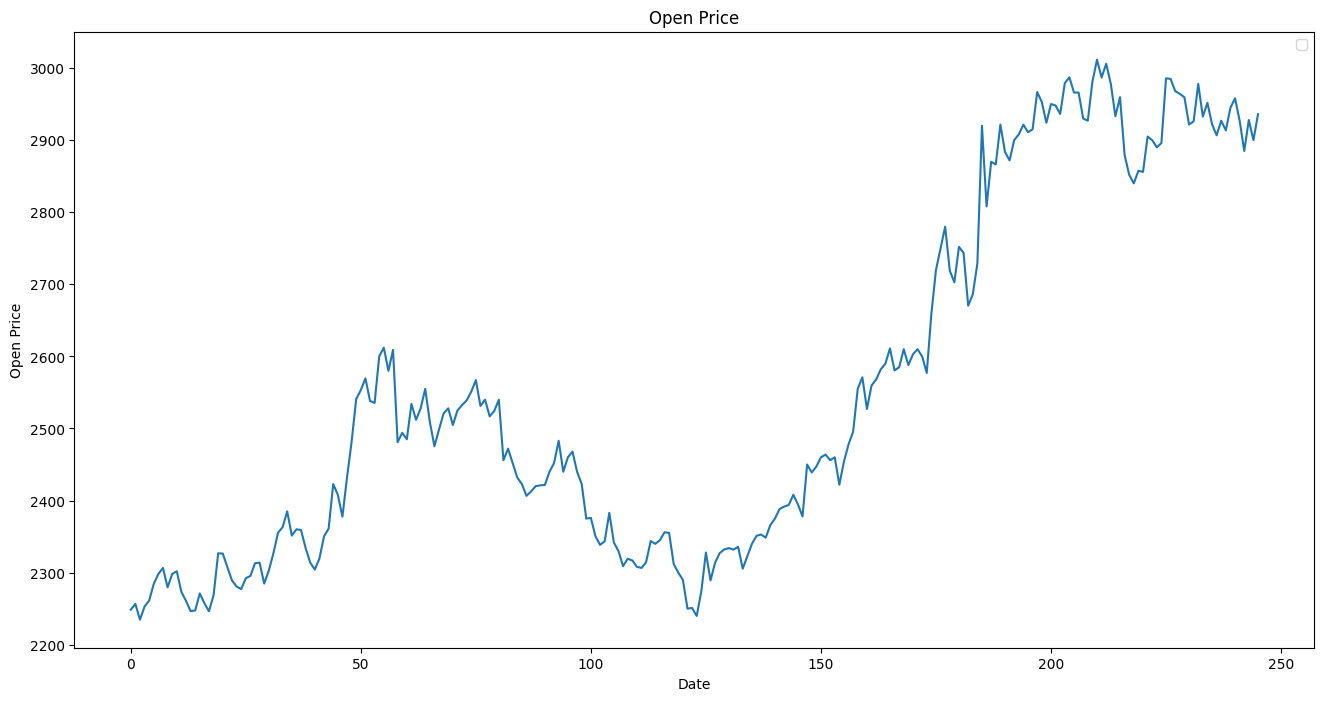

In [14]:
combined_prices = []

# Insert actual prices
combined_prices.extend(df['Open'])

# Insert predicted prices
# combined_prices.extend([None] * len(df['Open']))  # Placeholder for actual prices
combined_prices.extend(predicted_prices)

print(combined_prices)

# Create corresponding dates for the combined array

# Plot the combined prices
plt.figure(figsize=(16, 8))
plt.plot(df['Open'], )

plt.title('Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

# plt.plot(combined_prices)
# plt.ylabel("Price")
# plt.xlabel("Time")
# plt.title("Prediction of Next 6 Month open")
# plt.axhline(y=combined_prices[len(combined_prices)-1], color = 'red', linestyle = ':', label = 'NEXT 180D: {0}'.format(round(float(*combined_prices[len(combined_prices)-1]),2)))
# plt.legend()